# Project Convex Optimisation

### **Members of Naruto: Saison 1, Episode 3, 9:18:** 

- BERNADINE Léna  
- CHAMBEAU Maëva
- FONTAINE Nicola
- ODUFEJO OGOE Olubukola

#### About this file  
**Context**

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. 
For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

**Content**

Input variables (based on physicochemical tests):  
1. fixed acidity  
2. volatile acidity  
3. citric acid  
4. residual sugar  
5. chlorides  
6. free sulfur dioxide  
7. total sulfur dioxide  
8. density  
9. pH  
10. sulphates  
11. alcohol

Output variable (based on sensory data):  
12. quality (score between 0 and 10)

Tips

What might be an interesting thing to do, is, aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)

KNIME is a great tool (GUI) that can be used for this.
1 - File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.
2- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"
TRUE => "bad"
3- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)
4- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')
5- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and
6- Partitioning Node test data split output to input Decision Tree predictor Node
7- Decision Tree learner Node output to input Decision Tree Node input
8- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)


**Acknowledgements**

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

**Relevant publication**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

#### Main Goal

Use machine learning to determine which physiochemical properties make a wine 'good'!

#### Libraries imported

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Handling Null Values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
for index, entry in enumerate(df['quality']):
    if entry >= 7:
        df['quality'] [index] =  1
    else:
        df['quality'][index] = 0 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['quality'].describe()

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: quality, dtype: float64

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In machine learning, the performance of a model should not be evaluated on the training data. If the training data is the same as that of the test the machine will already have the repeats to the question.
It is important to test the machine on data it has never seen. This will give us an idea of its future performance on other data. The set test consists of 20% of the data and the other 80 make up the set train.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print('train set : ', x_train.shape)
print('test set : ', x_test.shape)

train set :  (1279, 11)
test set :  (320, 11)


Text(0.5, 1.0, 'test set')

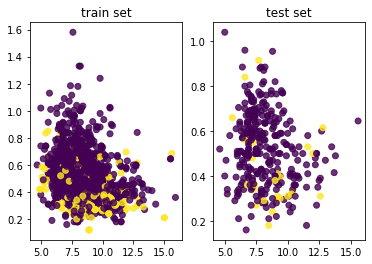

In [ ]:
plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,alpha=0.8)
plt.title('train set')
plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,alpha=0.8)
plt.title('test set')

In [ ]:
class_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide ','density','pH','sulphates','alcohol','quality']
train = x_train.shape[0]
test = x_test.shape[0]
df_fig = pd.DataFrame({'train': train,'test': test},index=class_names)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_fig['train'],
    name='Train Set',
    marker_color='#12c2e9'
))
fig.add_trace(go.Bar(
    y=df_fig['test'],
    name='Test set',
    marker_color='#c471ed'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution the set")
fig.show()

#### Normalisation

- All values of the data are brought back between 0 and 1, while maintaining the distances between the values. This is done using RobustScaler; RobustScaler uses the interquartile interval unlike MinMaxscaler which uses the min and max values. We choose RobustScaler because it avoids outliers.



In [ ]:
x_train = RobustScaler().fit_transform(x_train)
x_test = RobustScaler().fit_transform(x_test)

#### FEATURE SELECTION pour le model



- Pre-entrainer l'estimateur et examiner ses coefficients pour voir quelles sont les variables importantes.  
**SelectFromModel** entraine un estimateur puis selectionne les variables les plus importantes pour cet estimateur. 
 
Résultat == on a une matrice X de 1279 ligne et 11 cologne on veut la transformer en une matrice Y de 1 collogne et 1279 ligne. la matrice parametre téta est une matrice de 11 ligne et 1 cologne 
Cette méthode permet de calculer la moyenne de toutes les variables et d'ensuite selectionner les variables qui sont au dessus de la moyenne. 
L'estimateur va ainsi selectionner toutes les variables superieur à -0.50. 




In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier


In [ ]:
select = SelectFromModel(SGDClassifier(random_state=0),
                    threshold='mean' )
select.fit_transform(x_test,y_test)
select.fit_transform(x_train,y_train)
select.estimator_.coef_

array([[ 0.89665726, -2.16526124, -1.43465162, -0.14090328, -1.64387165,
         1.25187148, -2.99906339, -0.90173899, -0.48450954, -0.16438716,
         2.2633517 ]])

In [ ]:
# montre les dimention de la matrice téta 
select.estimator_.coef_.shape
select.estimator_.coef_.mean(axis=0).mean()

-0.5020460389659726

-  **Confusion Matrix** is a tool to measure the performance of a Machine Learning model by checking how often its predictions are true to reality in classification problems.

Text(0.5, 1.0, 'correlation of red wide quality')

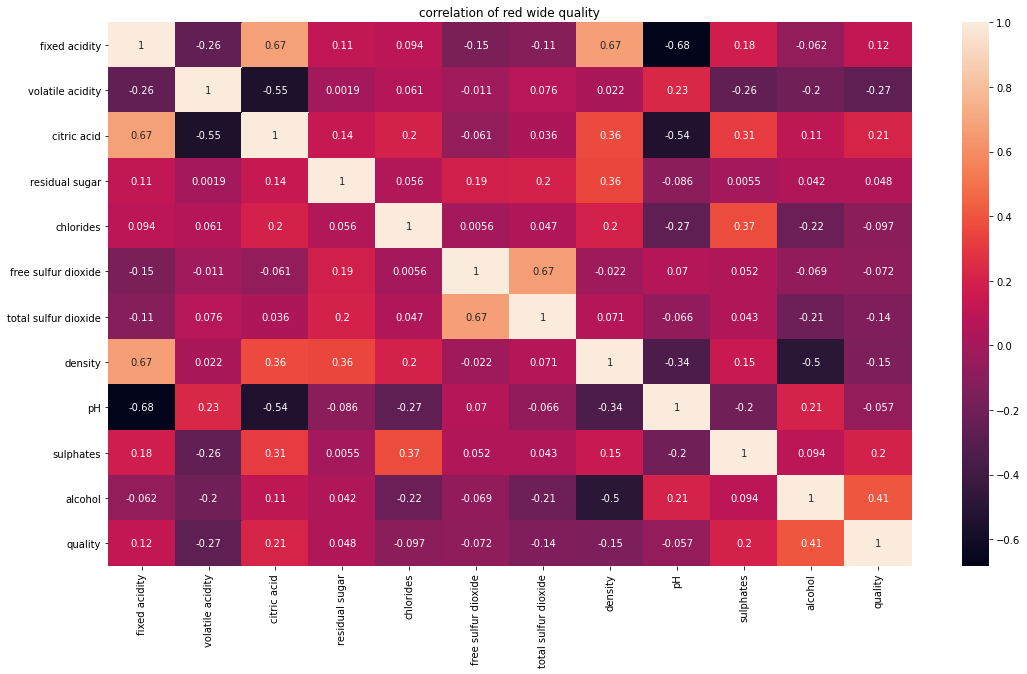

In [ ]:
matriceofconfusion = plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot=True)
plt.title('correlation of red wide quality')

#### Prediction Model

In [ ]:
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier(n_neighbors=2)])


In [ ]:
for i in range(len(models)):
    model = models[i][1]
    model.fit(x_train, y_train)
    y_prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, y_prediction)
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
    print(models[i][0])
    print(cm)
    print('train score: ', model.score(x_train,y_train))
    print('test score: ', model.score(x_test,y_test))
    print('Accuracy Score',accuracy_score(y_test, y_prediction))
    print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    # separation des models pour ne pas confondre 
    print('----------------- models separation --------------------------')



Logistic Regression
[[277  13]
 [ 20  10]]
train score:  0.8733385457388585
test score:  0.896875
Accuracy Score 0.896875
Mean Accuracy: 86.86 %
Standard Deviation: 3.12 %
----------------- models separation --------------------------
Decision Tree
[[266  24]
 [ 12  18]]
train score:  1.0
test score:  0.8875
Accuracy Score 0.8875
Mean Accuracy: 86.47 %
Standard Deviation: 3.78 %
----------------- models separation --------------------------
Random Forest
[[285   5]
 [ 16  14]]
train score:  1.0
test score:  0.934375
Accuracy Score 0.934375
Mean Accuracy: 90.31 %
Standard Deviation: 1.44 %
----------------- models separation --------------------------
SVM
[[287   3]
 [ 22   8]]
train score:  0.8921032056293979
test score:  0.921875
Accuracy Score 0.921875
Mean Accuracy: 87.26 %
Standard Deviation: 2.32 %
----------------- models separation --------------------------
KNeighbors
[[279  11]
 [ 17  13]]
train score:  0.9421422986708365
test score:  0.9125
Accuracy Score 0.9125
Mean Accuracy

#### Model optimization: model improvement 

- Cross-validation: consider to train then validate the models on several possible cut of the train set. it is a method for estimating the reliability of a model based on a sampling technique. The K-party data set (folds in English) is roughly equal. each k-party is used in turn as a test data set. The rest is used as training. Then we average the scores obtained and choose the score that is closest to the average. this is how we define the best parameters. Here, we choose to separate the data into 5 and we will agree on the KNeighborsclassifier. 

In [ ]:
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV

cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy')


array([0.83203125, 0.875     , 0.82421875, 0.875     , 0.87843137])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning:

Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



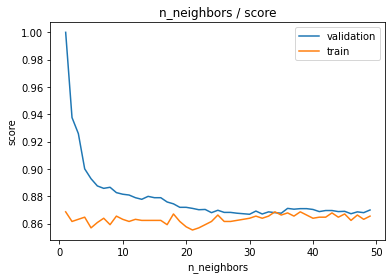

In [ ]:
# validation curve  
model_ = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model_, x_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k,train_score.mean(axis=1), label='validation' )
plt.plot(k,val_score.mean(axis=1), label='train' )
plt.title('n_neighbors / score')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning:

Pass param_name=random_state, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



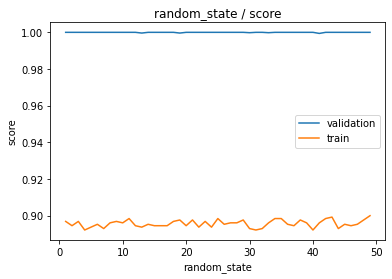

In [ ]:
# validation curve  
model_ = RandomForestClassifier()
j = np.arange(1, 50)
train_score, val_score = validation_curve(model_, x_train, y_train, 'random_state', j, cv=5)

plt.plot(j,train_score.mean(axis=1), label='validation' )
plt.plot(j,val_score.mean(axis=1), label='train' )
plt.title('random_state / score')
plt.xlabel('random_state')
plt.ylabel('score')
plt.legend()

- gridSearchCV : builds a grid of models with all combinations of hyperparameters present.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan']}
grid= GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train) # entrainement de l'estimateur 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
m = grid.best_estimator_ # sauvegarde du modele qui a obtenue la meilleur estimation 

In [ ]:
grid.best_score_ # le meilleur score pour le train 

0.8686611519607844

In [ ]:
# tester ce model sur les données test 
m.score(x_test, y_test)
confusion_matrix(y_test, m.predict(x_test))

array([[267,  23],
       [ 12,  18]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3630e863-cadc-4873-8b6d-5bc0c3918764' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>